In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60f84f865f412065aa25e83d9033e40f


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60f84f865f412065aa25e83d9033e40f&q=Boston


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | todi
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | kerman
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kampong thum
Processing Record 11 of Set 1 | mishelevka
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 15 of Set 1 | umba
Processing Record 16 of Set 1 | champerico
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | vernon
Proc

Processing Record 39 of Set 4 | virginia beach
Processing Record 40 of Set 4 | cradock
Processing Record 41 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | laje
Processing Record 44 of Set 4 | makakilo city
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | chilliwack
Processing Record 48 of Set 4 | yurimaguas
Processing Record 49 of Set 4 | careiro da varzea
Processing Record 50 of Set 4 | college
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | passo de camaragibe
Processing Record 3 of Set 5 | morant bay
Processing Record 4 of Set 5 | loandjili
Processing Record 5 of Set 5 | maragogi
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | chalchihuites
Processing Record 8 of Set 5 | halalo
City not found. Skipping...
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Se

Processing Record 27 of Set 8 | udachnyy
Processing Record 28 of Set 8 | kirakira
Processing Record 29 of Set 8 | port-cartier
Processing Record 30 of Set 8 | coihaique
Processing Record 31 of Set 8 | soldato-aleksandrovskoye
Processing Record 32 of Set 8 | lucea
Processing Record 33 of Set 8 | safford
Processing Record 34 of Set 8 | san andres
Processing Record 35 of Set 8 | del rio
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | burica
City not found. Skipping...
Processing Record 39 of Set 8 | baracoa
Processing Record 40 of Set 8 | panguna
Processing Record 41 of Set 8 | amderma
City not found. Skipping...
Processing Record 42 of Set 8 | keshan
City not found. Skipping...
Processing Record 43 of Set 8 | manga
Processing Record 44 of Set 8 | buritizeiro
Processing Record 45 of Set 8 | nagato
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | geraldton


Processing Record 13 of Set 12 | kimbe
Processing Record 14 of Set 12 | crossville
Processing Record 15 of Set 12 | baturaja
Processing Record 16 of Set 12 | farsund
Processing Record 17 of Set 12 | vila franca do campo
Processing Record 18 of Set 12 | port hardy
Processing Record 19 of Set 12 | makat
Processing Record 20 of Set 12 | waingapu
Processing Record 21 of Set 12 | nioro
Processing Record 22 of Set 12 | batagay-alyta
Processing Record 23 of Set 12 | ippy
Processing Record 24 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 12 | berlevag
Processing Record 26 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 27 of Set 12 | daru
Processing Record 28 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 29 of Set 12 | saravan
Processing Record 30 of Set 12 | port blair
Processing Record 31 of Set 12 | honiara
Processing Record 32 of Set 12 | pevek
Processing Record 33 of Set 12 | aden
Processing Record 34 of Se

In [26]:
len(city_data)

598

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Todi,42.7799,12.4046,52.83,63,0,7.14,IT,2022-04-29 02:06:55
1,Punta Arenas,-53.1500,-70.9167,42.12,75,99,17.22,CL,2022-04-29 02:02:27
2,Puerto Ayora,-0.7393,-90.3518,71.76,91,3,6.98,EC,2022-04-29 02:06:56
3,Yellowknife,62.4560,-114.3525,33.57,64,25,18.99,CA,2022-04-29 02:06:34
4,Kerman,30.2832,57.0788,55.26,33,0,4.61,IR,2022-04-29 02:06:56
5,Rikitea,-23.1203,-134.9692,77.05,69,0,18.34,PF,2022-04-29 02:06:57
6,Mataura,-46.1927,168.8643,57.47,62,8,0.92,NZ,2022-04-29 02:03:39
7,Kampong Thum,12.7111,104.8887,86.58,65,99,7.02,KH,2022-04-29 02:06:58
8,Mishelevka,52.8575,103.1719,43.02,75,100,5.55,RU,2022-04-29 02:06:58
9,Tiksi,71.6872,128.8694,18.90,81,83,8.39,RU,2022-04-29 02:00:58


In [44]:
new_column_order = ["column1","column8","column9","column2","column3","column4","column5","column6","column7"]

In [46]:
# city_data_df = city_data_df[new_column_order] -- TIS DOESNT WORK FOR ME

In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

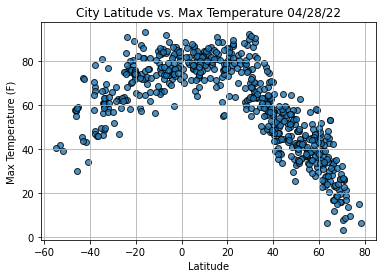

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

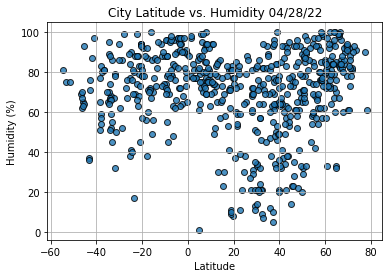

In [54]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

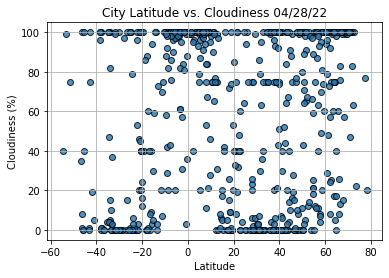

In [55]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

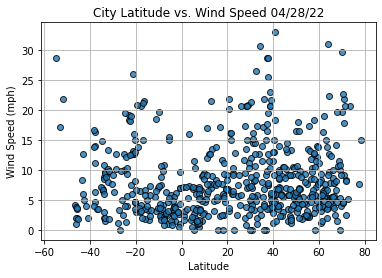

In [56]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()